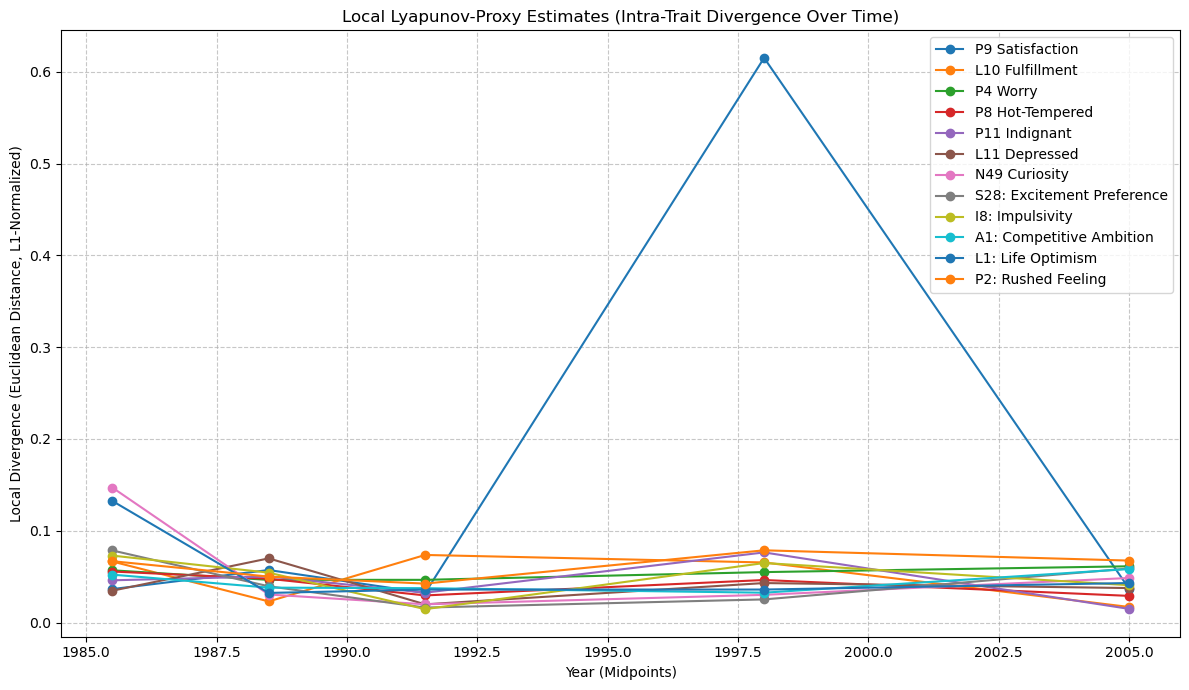

In [21]:
# For orthogonal validation that the psychometric ecosystem is considerable as lawfully dynamical
# Lyapunov exponent-like analysis (Lyapunov proxy) was run, as explained in the Appendix from Rodriguez 2025:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Define years and midpoints
years = [1984, 1987, 1990, 1993, 2003, 2007]
mid_years = [(years[i] + years[i+1]) / 2 for i in range(len(years) - 1)]

# Trait frequency data for Likert-scale (1–5) responses left to right (1, least agreed, on left)
# Years top to bottom (1984 top)
trait_data = {
    "P9 Satisfaction": [
        [76, 231, 294, 611, 698], #Row 1984: Likert scores 1 → 5
        [48, 146, 248, 523, 593], #Row 1987: Same structure throughout
        [40, 125, 288, 480, 489], #Row 1990
        [29, 158, 289, 447, 480], #Row 1993
        [92, 443, 156, 68, 15],   #Row 2003
        [85, 354, 138, 40, 17]    #Row 2007
    ],
    "L10 Fulfillment": [
        [193, 348, 445, 539, 382],
        [114, 252, 448, 447, 291],
        [106, 230, 423, 424, 240],
        [92, 212, 461, 344, 290],
        [40, 110, 239, 235, 149],
        [25, 95, 197, 189, 126]
    ],
    "P4 Worry": [
        [159, 374, 325, 548, 527],
        [95, 241, 300, 476, 448],
        [74, 229, 309, 455, 359],
        [85, 250, 316, 391, 364],
        [29, 133, 175, 250, 185],
        [22, 113, 171, 179, 144]
    ],
    "P8 Hot-Tempered": [
        [124, 249, 287, 473, 780],
        [73, 162, 280, 360, 683],
        [60, 156, 254, 376, 576],
        [43, 179, 243, 350, 586],
        [12, 75, 137, 214, 335],
        [17, 59, 119, 178, 259]
    ],
    "P11 Indignant": [
        [185, 457, 334, 524, 415],
        [114, 332, 312, 448, 345],
        [101, 337, 329, 381, 280],
        [112, 353, 305, 344, 289],
        [53, 163, 204, 217, 139],
        [38, 139, 166, 176, 109]
    ],
    "L11 Depressed": [
        [103, 159, 269, 527, 855],
        [54, 105, 251, 450, 700],
        [38, 98, 263, 464, 563],
        [40, 114, 265, 453, 535],
        [13, 52, 135, 253, 323],
        [9, 43, 127, 200, 246]
    ],
    "N49 Curiosity": [
        [229, 520, 295, 310, 218],
        [116, 371, 402, 346, 287],
        [97, 343, 401, 319, 237],
        [99, 327, 385, 334, 245],
        [44, 196, 207, 189, 125],
        [31, 164, 193, 136, 103]
    ],
    "S28: Excitement Preference": [
        [168, 408, 514, 468, 348],
        [107, 365, 502, 360, 211],
        [94, 343, 505, 309, 168],
        [91, 341, 505, 285, 174],
        [38, 180, 287, 166, 101],
        [28, 140, 266, 128, 67]
    ],
    "I8: Impulsivity": [
        [189, 332, 263, 584, 556],
        [108, 241, 313, 457, 450],
        [110, 228, 294, 452, 343],
        [113, 236, 284, 437, 351],
        [46, 117, 181, 266, 165],
        [27, 84, 154, 214, 154]
    ],
    "A1: Competitive Ambition": [
        [78, 190, 318, 501, 836],
        [38, 98, 279, 455, 700],
        [34, 97, 292, 402, 600],
        [36, 131, 302, 368, 570],
        [16, 72, 184, 207, 297],
        [11, 67, 171, 170, 213]
    ],
    "L1: Life Optimism": [
        [278, 656, 515, 322, 156],
        [154, 444, 589, 238, 137],
        [117, 393, 569, 231, 112],
        [97, 363, 578, 264, 104],
        [36, 219, 316, 138, 63],
        [31, 156, 270, 121, 53]
    ],
    "P2: Rushed Feeling": [
        [337, 573, 274, 429, 312],
        [207, 435, 293, 368, 269],
        [149, 369, 310, 365, 237],
        [133, 411, 299, 327, 238],
        [54, 183, 185, 190, 162],
        [44, 146, 135, 191, 116]
    ],
}

# Function to compute Lyapunov-like divergence (L1-normalized)
# Normalization occurs here to make up for the fact that, in the previous modules, conversion
# from Raw Likert-data to entropy made for, essentially, 'normalization by way of dimensional reduction'
def compute_local_lyapunov(data):
    data = normalize(data, norm='l1')
    return [np.linalg.norm(data[i+1] - data[i]) for i in range(len(data)-1)]

# === Plotting ===
plt.figure(figsize=(12, 7))

for trait, freqs in trait_data.items():
    data = np.array(freqs)
    lyap = compute_local_lyapunov(data)
    plt.plot(mid_years, lyap, marker='o', label=trait)

plt.title("Local Lyapunov-Proxy Estimates (Intra-Trait Divergence Over Time)")
plt.xlabel("Year (Midpoints)")
plt.ylabel("Local Divergence (Euclidean Distance, L1-Normalized)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
# Regarding why the divergent 'spike' doesn't show in the 
#entropy extraction [module 01: entropy_from_likert_data]:
#
#1. Entropy Decline (Slope: -0.0144, R²=0.868)
#Shows a strong, steady decline in Shannon entropy for Satisfaction.
#
#Indicates responses are becoming more predictable or clustered.
#
#High R² means the trend is well explained linearly over the full time range.
#
#2. Lyapunov-Like Spike (~2003)
#Despite the smooth global trend, there’s a large local 
#divergence between 1993–2003.
#
#This suggests a rapid redistribution or "regime shift" in 
#how people responded to Satisfaction in this period.
#
#The entropy trend doesn't “see” this spike because it 
#smooths out over time — the Lyapunov metric detects 
#local chaos or instability in the trait’s structure.



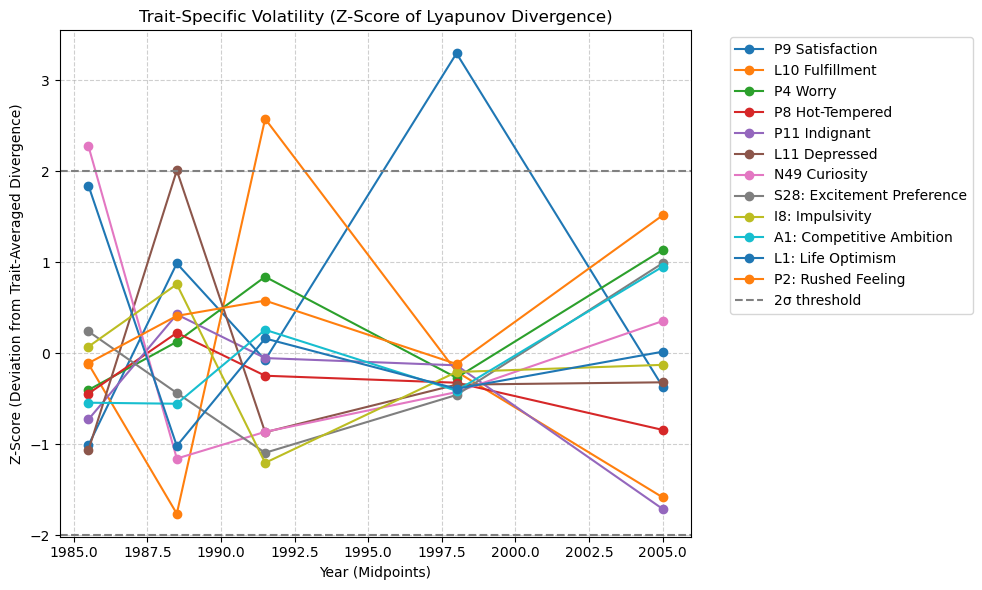


Trait Volatility Summary (Lyapunov Divergence):
P9 Satisfaction                 Mean=0.1556, Std=0.2300, Slope=+0.00976, R²=0.088
L10 Fulfillment                 Mean=0.0491, Std=0.0240, Slope=-0.00144, R²=0.177
P4 Worry                        Mean=0.0532, Std=0.0059, Slope=+0.00048, R²=0.330
P8 Hot-Tempered                 Mean=0.0417, Std=0.0106, Slope=-0.00098, R²=0.426
P11 Indignant                   Mean=0.0440, Std=0.0204, Slope=-0.00087, R²=0.090
L11 Depressed                   Mean=0.0410, Std=0.0164, Slope=-0.00033, R²=0.020
N49 Curiosity                   Mean=0.0553, Std=0.0468, Slope=-0.00298, R²=0.198
S28: Excitement Preference      Mean=0.0437, Std=0.0226, Slope=-0.00045, R²=0.020
I8: Impulsivity                 Mean=0.0495, Std=0.0205, Slope=-0.00071, R²=0.059
A1: Competitive Ambition        Mean=0.0437, Std=0.0098, Slope=+0.00037, R²=0.069
L1: Life Optimism               Mean=0.0560, Std=0.0385, Slope=-0.00282, R²=0.264
P2: Rushed Feeling              Mean=0.0611, Std=

In [26]:
# Z-Score Computation:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy.stats import zscore, linregress

# === Define years and midpoints ===
years = [1984, 1987, 1990, 1993, 2003, 2007]
mid_years = [(years[i] + years[i+1]) / 2 for i in range(len(years) - 1)]

# === Trait frequency data (Likert 1–5 response distributions) ===
trait_data = {
    "P9 Satisfaction": [
        [76, 231, 294, 611, 698], #Row 1984: Likert scores 1 → 5
        [48, 146, 248, 523, 593], #Row 1987: Same structure throughout
        [40, 125, 288, 480, 489], #Row 1990
        [29, 158, 289, 447, 480], #Row 1993
        [92, 443, 156, 68, 15],   #Row 2003
        [85, 354, 138, 40, 17]    #Row 2007
    ],
    "L10 Fulfillment": [
        [193, 348, 445, 539, 382],
        [114, 252, 448, 447, 291],
        [106, 230, 423, 424, 240],
        [92, 212, 461, 344, 290],
        [40, 110, 239, 235, 149],
        [25, 95, 197, 189, 126]
    ],
    "P4 Worry": [
        [159, 374, 325, 548, 527],
        [95, 241, 300, 476, 448],
        [74, 229, 309, 455, 359],
        [85, 250, 316, 391, 364],
        [29, 133, 175, 250, 185],
        [22, 113, 171, 179, 144]
    ],
    "P8 Hot-Tempered": [
        [124, 249, 287, 473, 780],
        [73, 162, 280, 360, 683],
        [60, 156, 254, 376, 576],
        [43, 179, 243, 350, 586],
        [12, 75, 137, 214, 335],
        [17, 59, 119, 178, 259]
    ],
    "P11 Indignant": [
        [185, 457, 334, 524, 415],
        [114, 332, 312, 448, 345],
        [101, 337, 329, 381, 280],
        [112, 353, 305, 344, 289],
        [53, 163, 204, 217, 139],
        [38, 139, 166, 176, 109]
    ],
    "L11 Depressed": [
        [103, 159, 269, 527, 855],
        [54, 105, 251, 450, 700],
        [38, 98, 263, 464, 563],
        [40, 114, 265, 453, 535],
        [13, 52, 135, 253, 323],
        [9, 43, 127, 200, 246]
    ],
    "N49 Curiosity": [
        [229, 520, 295, 310, 218],
        [116, 371, 402, 346, 287],
        [97, 343, 401, 319, 237],
        [99, 327, 385, 334, 245],
        [44, 196, 207, 189, 125],
        [31, 164, 193, 136, 103]
    ],
    "S28: Excitement Preference": [
        [168, 408, 514, 468, 348],
        [107, 365, 502, 360, 211],
        [94, 343, 505, 309, 168],
        [91, 341, 505, 285, 174],
        [38, 180, 287, 166, 101],
        [28, 140, 266, 128, 67]
    ],
    "I8: Impulsivity": [
        [189, 332, 263, 584, 556],
        [108, 241, 313, 457, 450],
        [110, 228, 294, 452, 343],
        [113, 236, 284, 437, 351],
        [46, 117, 181, 266, 165],
        [27, 84, 154, 214, 154]
    ],
    "A1: Competitive Ambition": [
        [78, 190, 318, 501, 836],
        [38, 98, 279, 455, 700],
        [34, 97, 292, 402, 600],
        [36, 131, 302, 368, 570],
        [16, 72, 184, 207, 297],
        [11, 67, 171, 170, 213]
    ],
    "L1: Life Optimism": [
        [278, 656, 515, 322, 156],
        [154, 444, 589, 238, 137],
        [117, 393, 569, 231, 112],
        [97, 363, 578, 264, 104],
        [36, 219, 316, 138, 63],
        [31, 156, 270, 121, 53]
    ],
    "P2: Rushed Feeling": [
        [337, 573, 274, 429, 312],
        [207, 435, 293, 368, 269],
        [149, 369, 310, 365, 237],
        [133, 411, 299, 327, 238],
        [54, 183, 185, 190, 162],
        [44, 146, 135, 191, 116]
    ]
}

# === Lyapunov divergence computation ===
def compute_local_lyapunov(data):
    data = normalize(data, norm='l1')
    return [np.linalg.norm(data[i+1] - data[i]) for i in range(len(data)-1)]

trait_names = list(trait_data.keys())
lyapunov_values = []

for trait in trait_names:
    data = np.array(trait_data[trait])
    lyap = compute_local_lyapunov(data)
    lyapunov_values.append(lyap)

# === Convert to array and compute Z-scores ===
lyapunov_array = np.array(lyapunov_values)
z_scores = zscore(lyapunov_array, axis=0)

# === Plotting volatility (Z-score of Lyapunov divergence) ===
plt.figure(figsize=(10, 6))
for i, trait in enumerate(trait_names):
    plt.plot(mid_years, z_scores[i], marker='o', label=trait)

plt.axhline(y=2, color='gray', linestyle='--', label='2σ threshold')
plt.axhline(y=-2, color='gray', linestyle='--')
plt.title("Trait-Specific Volatility (Z-Score of Lyapunov Divergence)")
plt.xlabel("Year (Midpoints)")
plt.ylabel("Z-Score (Deviation from Trait-Averaged Divergence)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# === Numerical summary: mean, std, linear trend of divergence ===
print("\nTrait Volatility Summary (Lyapunov Divergence):")
for i, trait in enumerate(trait_names):
    lyap = lyapunov_array[i]
    slope, intercept, r_value, p_value, std_err = linregress(mid_years, lyap)
    print(f"{trait:30s}  Mean={np.mean(lyap):.4f}, Std={np.std(lyap):.4f}, "
          f"Slope={slope:+.5f}, R²={r_value**2:.3f}")
